In [1]:
import stereo as st
import numpy as np
import pandas as pd
import seaborn as sns
import os
import diopy
import scanpy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
adata = sc.read_h5ad('/data1/zhangyang/Method/Figure3_file/method_h5ad_data/BC_D06054C4_bin50_scanpy_out.h5ad')

In [4]:
adata.X.min()

0

In [5]:
csv = pd.read_csv('/data1/zhangyang/Method/Figure3_file/BC_D06054C4_bin50_RCTD_celltype.csv')
csv.rename(columns={'Unnamed: 0': 'st_barcode'}, inplace=True)

In [6]:
def vector(on=False):
    if on:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=False)
    else:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=True)
vector(False)

# 前处理

In [9]:
adata.obs['st_barcode'] = 'DNB_' + adata.obs['x'].astype(str)+'_'+ adata.obs['y'].astype(str)
csv['st_barcode'] = csv['st_barcode'].astype(str)
adata.obs = pd.merge(adata.obs, csv, on='st_barcode', how='left')
print(adata.obs.head())

  orig.ident     x     y     st_barcode   B-cells      CAFs  \
0     sample  3350  8200  DNB_3350_8200       NaN       NaN   
1     sample  3350  8250  DNB_3350_8250  0.000181  0.350681   
2     sample  3350  8300  DNB_3350_8300  0.089885  0.243287   
3     sample  3350  8350  DNB_3350_8350       NaN       NaN   
4     sample  3400  8250  DNB_3400_8250       NaN       NaN   

   Cancer Epithelial  Endothelial   Myeloid  Normal Epithelial       PVL  \
0                NaN          NaN       NaN                NaN       NaN   
1           0.188157     0.049133  0.020728           0.056183  0.000181   
2           0.161482     0.055275  0.000258           0.235215  0.000258   
3                NaN          NaN       NaN                NaN       NaN   
4                NaN          NaN       NaN                NaN       NaN   

   Plasmablasts   T-cells  
0           NaN       NaN  
1      0.031325  0.000181  
2      0.000258  0.000258  
3           NaN       NaN  
4           NaN       Na

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:788: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


## 前处理

In [13]:
import cv2 as cv2
#找到tissue边缘坐标
adata.obs['X']=adata.obs['x']//50
adata.obs['Y']=adata.obs['y']//50
df=adata.obs[['X','Y']]
# 确定图像的大小
max_x = df['X'].max()
max_y = df['Y'].max()
image_size = (max_y + 1, max_x + 1)  # 图像大小为 (height, width)

# 创建一个空白的二值图像
image = np.zeros(image_size, dtype=np.uint8)

# 将 DataFrame 中的坐标点填充到图像中
for index, row in df.iterrows():
    x, y = row['X'], row['Y']
    image[y, x] = 255  # 填充为白色（255）

# 应用 Canny 边缘检测
edges = cv2.Canny(image, 50, 150)

# 获取边缘坐标
edge_coordinates = np.column_stack(np.where(edges > 0))

# 打印边缘坐标
print("边缘坐标：")
print(edge_coordinates)

边缘坐标：
[[ 36 343]
 [ 36 344]
 [ 37 342]
 ...
 [308 266]
 [309 262]
 [309 266]]


In [14]:
sc.pp.normalize_total(adata, inplace=True)

In [37]:
adata.X.max()

931

In [16]:
tmp= adata.raw.to_adata()

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [17]:
sc.tl.score_genes(tmp, ['IGKC','IGHG4','IGHG1','IGLC1','IGLC2','IGLC3','IGLC4','IGLC5','IGLC6','IGLC7'], score_name='PCA')
sc.tl.score_genes(tmp, ['TRBC1','TRBC2','TRAC','CXCL13','MS4A1','FDCSP','CD3E','CD3D','CD3G'], score_name='TLS')

In [18]:
adata = tmp

In [19]:
adata.X.max()

931

# Figure4B

## PCA TLS Distribution

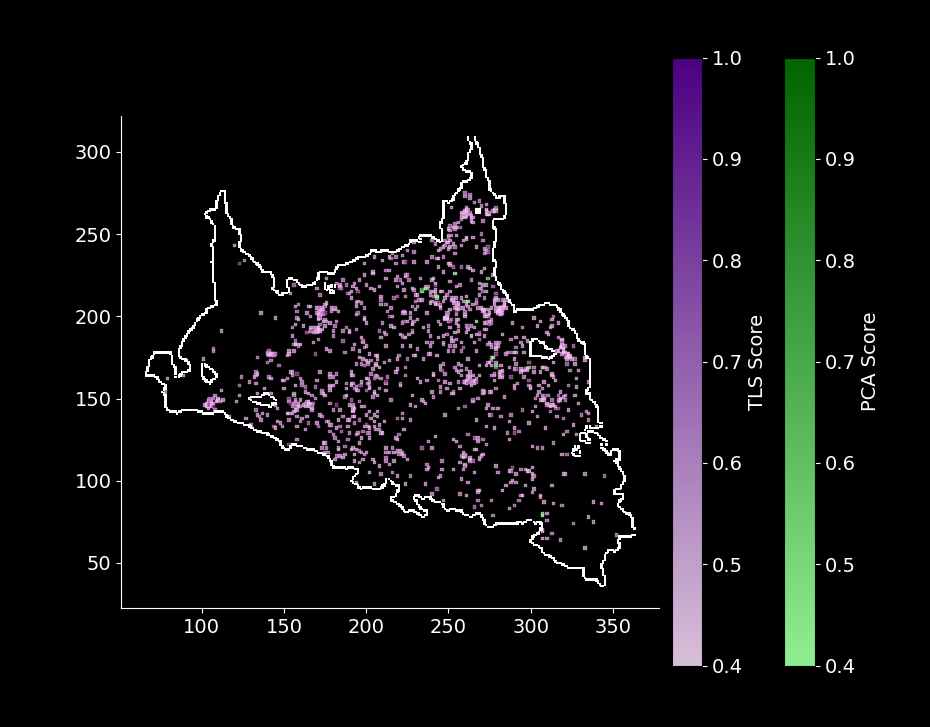

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable
import pandas as pd
import scanpy as sc

# 假设 adata 和 edge_coordinates 已经定义
a1 = adata.obs['PCA']
m1 = a1.max()
n1 = a1.min()
nPCA = (a1 - n1) / (m1 - n1)
adata.obs['nPCA'] = nPCA

a2 = adata.obs['TLS']
m2 = a2.max()
n2 = a2.min()
nTLS = (a2 - n2) / (m2 - n2)
adata.obs['nTLS'] = nTLS

# 设置绘图参数
def vector(on=False):
    if on:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=False)
    else:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=True)
vector(False)

# 创建数据框
df1 = adata.obs[['nPCA', 'nTLS', 'X', 'Y']]
df2 = pd.DataFrame(edge_coordinates, columns=['Y', 'X'])

# 创建黑色背景的图形
plt.figure(figsize=(10, 8))
ax = plt.gca()
ax.set_facecolor('black')  # 设置绘图区域背景为黑色
ax.figure.patch.set_facecolor('black')  # 设置图框背景为黑色

# 定义绿色调色板
colors = [(0.7, 1.0, 0.7), (0.0, 0.5, 0.0)]  # (浅绿色, 深绿色)
cmap_name = 'custom_green'
custom_green_cmap = LinearSegmentedColormap.from_list(cmap_name, colors)

# 绘制第一个 DataFrame 的 nPCA 散点图
green_scatter = sns.scatterplot(
    x='X', 
    y='Y',   
    hue='nPCA',  # 使用 nPCA 的数值控制点的颜色
    palette=custom_green_cmap,  # 使用绿色调色板
    data=df1[df1['nPCA'] > 0.3],
    marker='s',  # 设置点的形状为正方形
    alpha=0.8,   # 设置透明度为 80%
    legend=None, # 不显示图例
    s=6,        # 调整点的大小为 12
    ax=ax
)

# 定义紫色调色板
purple_colors = [(1.0, 0.7, 1.0), (0.5, 0.0, 0.5)]  # (浅紫色, 深紫色)
purple_cmap_name = 'custom_purple'
custom_purple_cmap = LinearSegmentedColormap.from_list(purple_cmap_name, purple_colors)

# 绘制第二个 DataFrame 的 nTLS 散点图
purple_scatter = sns.scatterplot(
    x='X', 
    y='Y', 
    hue='nTLS',   # 使用 nTLS 的数值控制点的颜色
    palette=custom_purple_cmap,  # 使用紫色调色板
    data=df1[df1['nTLS'] > 0.35],
    marker='s',  # 设置点的形状为正方形
    alpha=0.7,   # 设置透明度为 70%
    legend=None, # 不显示图例
    s=6,        # 调整点的大小为 12
    ax=ax
)

# 绘制第二个 DataFrame 的 X 和 Y 列
sns.scatterplot(
    x='X', 
    y='Y', 
    data=df2,
    color='white',  # 设置点的颜色为白色
    marker='s',     # 设置点的形状为正方形
    s=3,            # 设置点的大小
    edgecolor='none',  # 去掉点的边框
    legend=None,    # 不显示图例
    ax=ax
)

# 设置坐标轴颜色为白色
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_aspect('equal')

# 创建自定义颜色映射 for nPCA (浅绿色到深绿色)
cmap_a = LinearSegmentedColormap.from_list('custom_greens', ['lightgreen', 'darkgreen'])
norm_a = Normalize(vmin=0.4, vmax=df1['nPCA'].max())
sm_a = ScalarMappable(norm=norm_a, cmap=cmap_a)
sm_a.set_array([])
cbar_a = plt.colorbar(sm_a, ax=plt.gca(), orientation='vertical', pad=0.02)
cbar_a.set_label('PCA Score', color='white')
cbar_a.ax.tick_params(colors='white')

# 创建自定义颜色映射 for nTLS (浅紫色到深紫色)
cmap_b = LinearSegmentedColormap.from_list('custom_purples', ['thistle', 'indigo'])
norm_b = Normalize(vmin=0.4, vmax=df1['nTLS'].max())
sm_b = ScalarMappable(norm=norm_b, cmap=cmap_b)
sm_b.set_array([])
cbar_b = plt.colorbar(sm_b, ax=plt.gca(), orientation='vertical', pad=0.02)
cbar_b.set_label('TLS Score', color='white')
cbar_b.ax.tick_params(colors='white')

# 关闭网格
ax.grid(False)

# 保存图形
custom_path = 'BC_D06050C4_bin50_scanpy_out.png'  # 自定义保存路径和文件名
plt.savefig(custom_path, dpi=600, bbox_inches='tight', transparent=False)  # 保存为黑底
plt.show()
plt.close()  # 关闭图形以释放资源

In [21]:
adata.obs['TLSorPCA'] = 'other'
adata.obs.loc[adata.obs['nPCA'] > 0.3,'TLSorPCA'] = 'PCA'
adata.obs.loc[adata.obs['nTLS'] > 0.3,'TLSorPCA'] = 'TLS'

In [22]:
adata.obs['PCA'] = adata.obs['PCA'].astype(str)
adata.obs['TLS'] = adata.obs['TLS'].astype(str)
adata.obs.loc[adata.obs['TLSorPCA'] == 'PCA','PCA'] = 'yes'
adata.obs.loc[adata.obs['TLSorPCA'] == 'TLS','TLS'] = 'yes'
adata.obs.loc[adata.obs['TLS'] != 'yes','TLS'] = 'NA'
adata.obs.loc[adata.obs['PCA'] != 'yes','PCA'] = 'NA'

In [ ]:
# in python
diopy.output.write_h5(data_py, file = 'BC_D06054C4_bin50_with_TLSorPCA_scanpy_out_scdata.h5')

## RCTD

In [ ]:
library(spacexr)
library(dior)
library(Matrix)
library(Seurat)
library(data.table)
# in R
adata = dior::read_h5(file='/data1/fengyu/methods/scRNA/BRCA_GSE176078/brca_annotated.h5', target.object = 'seurat')
counts <- as.matrix(adata@assays$RNA@counts)
meta_data <-adata@meta.data
mode(counts) <- "integer"
cell_types <- meta_data$celltype_major
names(cell_types) <-  rownames(meta_data)
cell_types <- as.factor(cell_types)
nUMI <- meta_data$n_genes_by_counts
names(nUMI) <- rownames(meta_data)
reference <- Reference(counts, cell_types, nUMI)

In [ ]:
adata_spatial = dior::read_h5(file='BC_D06054C4_bin50_with_TLSorPCA_scanpy_out_scdata.h5', target.object = 'seurat')

In [ ]:
df_extracted = adata.obs[['x', 'y']]
df_extracted['DNB'] = df_extracted.apply(lambda row: f"DNB_{row['x']}_{row['y']}", axis=1)
df_final = df_extracted[['DNB', 'x', 'y']]
print("\n最终的 DataFrame:")
print(df_final)

In [ ]:
adata_spatial@meta.data$DNB <- paste0("DNB_", adata_spatial@meta.data$x, "_", adata_spatial@meta.data$y)
counts_spatial <- as.matrix(adata_spatial@assays$RNA@counts)
for (col in colnames(counts_spatial)) {
  if (col %in% rownames(adata_spatial@meta.data)) {  
    new_name <- adata_spatial@meta.data[col, "DNB"] 
    colnames(counts_spatial)[colnames(counts_spatial) == col] <- new_name
  }
}
nUMI <- colSums(counts_spatial)
coords= read.csv('BC_D06054C4_bin50_with_TLSorPCA_spatial_coords.csv',sep=',',header = TRUE,col.names=c('x','y'))

In [ ]:
puck <- SpatialRNA(coords,counts_spatial, nUMI)

In [ ]:
myRCTD <- create.RCTD(puck, reference, max_cores = 4)
myRCTD <- run.RCTD(myRCTD, doublet_mode = 'full')
saveRDS(myRCTD, file = 'BC_D06054C4_bin50_myRCTD.rds')

In [ ]:
csv <-  as.data.frame(myRCTD@results$weights)

In [ ]:
write.csv(csv, file = "BC_D06054C4_bin50_RCTD_celltype.csv", row.names = TRUE, fileEncoding = "UTF-8")

## bar chart

In [23]:
data1 = pd.read_csv('BC_D06054C4_bin50_RCTD_celltype.csv')

In [24]:
#对列进行重命名
data1.rename(columns={'Unnamed: 0': 'st_barcode'}, inplace=True)

In [25]:
data2 = adata.obs

In [26]:
data2.columns

Index(['orig.ident', 'x', 'y', 'st_barcode', 'B-cells', 'CAFs',
       'Cancer Epithelial', 'Endothelial', 'Myeloid', 'Normal Epithelial',
       'PVL', 'Plasmablasts', 'T-cells', 'X', 'Y', 'PCA', 'TLS', 'nPCA',
       'nTLS', 'TLSorPCA'],
      dtype='object')

In [27]:
data2

,orig.ident,x,y,st_barcode,B-cells,CAFs,Cancer Epithelial,Endothelial,Myeloid,Normal Epithelial,PVL,Plasmablasts,T-cells,X,Y,PCA,TLS,nPCA,nTLS,TLSorPCA
0,sample,3350,8200,DNB_3350_8200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67,164,NA,NA,0.016921,0.172563,other
1,sample,3350,8250,DNB_3350_8250,0.000181,0.350681,0.188157,0.049133,0.020728,0.056183,0.000181,0.031325,0.000181,67,165,NA,NA,0.016473,0.168455,other
2,sample,3350,8300,DNB_3350_8300,0.089885,0.243287,0.161482,0.055275,0.000258,0.235215,0.000258,0.000258,0.000258,67,166,NA,NA,0.016839,0.172563,other
3,sample,3350,8350,DNB_3350_8350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67,167,NA,NA,0.016961,0.172563,other
4,sample,3400,8250,DNB_3400_8250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68,165,NA,NA,0.016921,0.172563,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34965,sample,18100,3800,DNB_18100_3800,0.000127,0.195729,0.268873,0.278804,0.000127,0.000159,0.000127,0.000127,0.000127,362,76,NA,NA,0.018340,0.170509,other
34966,sample,18150,3400,DNB_18150_3400,0.024177,0.203040,0.446771,0.000181,0.049690,0.000181,0.040915,0.000181,0.000181,363,68,NA,NA,0.016392,0.166400,other
34967,sample,18150,3450,DNB_18150_3450,0.009965,0.190874,0.289875,0.021576,0.038214,0.185621,0.006001,0.000258,0.005834,363,69,NA,NA,0.014602,0.156129,other
34968,sample,18150,3500,DNB_18150_3500,0.000181,0.140391,0.576537,0.111356,0.024071,0.028495,0.004108,0.000181,0.019510,363,70,NA,NA,0.014317,0.156129,other


In [28]:
TLS = data2[data2['TLS'] == 'yes']['st_barcode'].tolist()
PCA = data2[data2['PCA'] == 'yes']['st_barcode'].tolist()

In [29]:
TLS_row = data1[data1['st_barcode'].isin(TLS)]
PCA_row = data1[data1['st_barcode'].isin(PCA)]

In [30]:
TLS_row.columns

Index(['st_barcode', 'B-cells', 'CAFs', 'Cancer Epithelial', 'Endothelial',
       'Myeloid', 'Normal Epithelial', 'PVL', 'Plasmablasts', 'T-cells'],
      dtype='object')

In [31]:
TLS_T = TLS_row['T-cells'].sum()
TLS_B = TLS_row['B-cells'].sum()
TLS_P = TLS_row['Plasmablasts'].sum()
TLS_all = TLS_B + TLS_P + TLS_T

PCA_T = PCA_row['T-cells'].sum()
PCA_B = PCA_row['B-cells'].sum()
PCA_P = PCA_row['Plasmablasts'].sum()
PCA_all = PCA_B + PCA_P + PCA_T

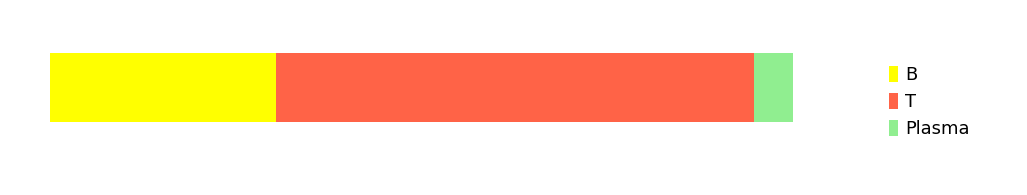

In [32]:
# 计算百分比
percent_b_cell = (TLS_B / TLS_all) * 100
percent_t_cell = (TLS_T / TLS_all) * 100
percent_plasma_cell = (TLS_P / TLS_all) * 100

# 创建数据
labels = ['Cell Types']
values_b_cell = [percent_b_cell]
values_t_cell = [percent_t_cell]
values_plasma_cell = [percent_plasma_cell]

# 定义颜色
colors = {
    'B': '#FFFF00',  # 淡黄色
    'T': '#FF6347',  # 淡红色
    'Plasma': '#90EE90'  # 淡绿色
}

# 绘制水平堆叠条形图
fig, ax = plt.subplots(figsize=(10, 1))  # 调整图形大小为更瘦高样式，宽度10英寸，高度1英寸
bar_height = 0.1  # 设置条形的高度，使其更细

# 绘制堆叠条形图
ax.barh(labels, values_b_cell, height=bar_height, label='B', color=colors['B'])
ax.barh(labels, values_t_cell, left=values_b_cell, height=bar_height, label='T', color=colors['T'])
ax.barh(labels, values_plasma_cell, left=[i + j for i, j in zip(values_b_cell, values_t_cell)], height=bar_height, label='Plasma', color=colors['Plasma'])

# 去除标题和坐标轴标签
ax.set_title('')  # 去除标题
ax.set_xlabel('')  # 去除 x 轴标签
ax.set_ylabel('')  # 去除 y 轴标签

# 去除坐标轴刻度
ax.set_xticks([])  # 去除 x 轴刻度
ax.set_yticks([])  # 去除 y 轴刻度

# 去除坐标轴边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# 添加图例
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))  # 将图例放在图形外部

# 保存图形为 PNG 格式
plt.savefig('BC_D06054C4_bin50_TLS.pdf', dpi=600, bbox_inches='tight', transparent=True)

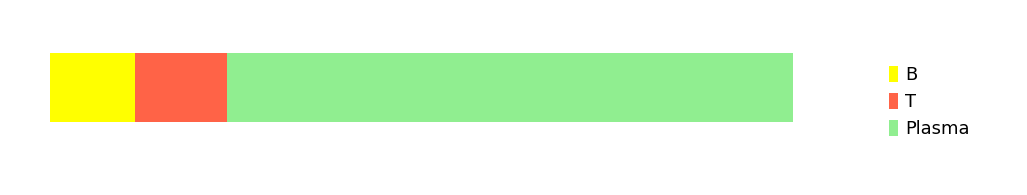

In [33]:
# 计算百分比
percent_b_cell = (PCA_B / PCA_all) * 100
percent_t_cell = (PCA_T / PCA_all) * 100
percent_plasma_cell = (PCA_P / PCA_all) * 100

# 创建数据
labels = ['Cell Types']
values_b_cell = [percent_b_cell]
values_t_cell = [percent_t_cell]
values_plasma_cell = [percent_plasma_cell]

# 定义颜色
colors = {
    'B': '#FFFF00',  # 淡黄色
    'T': '#FF6347',  # 淡红色
    'Plasma': '#90EE90'  # 淡绿色
}

# 绘制水平堆叠条形图
fig, ax = plt.subplots(figsize=(10, 1))  # 调整图形大小为更瘦高样式，宽度10英寸，高度1英寸
bar_height = 0.1  # 设置条形的高度，使其更细

# 绘制堆叠条形图
ax.barh(labels, values_b_cell, height=bar_height, label='B', color=colors['B'])
ax.barh(labels, values_t_cell, left=values_b_cell, height=bar_height, label='T', color=colors['T'])
ax.barh(labels, values_plasma_cell, left=[i + j for i, j in zip(values_b_cell, values_t_cell)], height=bar_height, label='Plasma', color=colors['Plasma'])

# 去除标题和坐标轴标签
ax.set_title('')  # 去除标题
ax.set_xlabel('')  # 去除 x 轴标签
ax.set_ylabel('')  # 去除 y 轴标签

# 去除坐标轴刻度
ax.set_xticks([])  # 去除 x 轴刻度
ax.set_yticks([])  # 去除 y 轴刻度

# 去除坐标轴边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# 添加图例
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))  # 将图例放在图形外部

# 保存图形为 PNG 格式
plt.savefig('BC_D06054C4_bin50_PCA.pdf', dpi=600, bbox_inches='tight', transparent=True)

# Figure4C

... storing 'PCA' as categorical
... storing 'TLS' as categorical
... storing 'TLSorPCA' as categorical
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


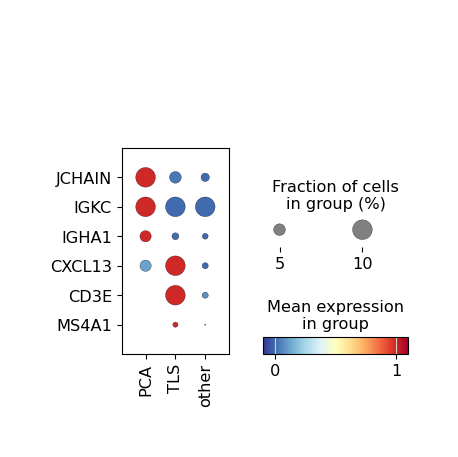

In [34]:
adata.obs.loc[adata.obs.TLS == 'yes', 'TLSorPCA'] = 'TLS'
adata.obs.loc[adata.obs.PCA == 'yes', 'TLSorPCA'] = 'PCA'
genels = ['JCHAIN', 'IGKC', 'IGHA1', 'CXCL13', 'CD3E', 'MS4A1']
filteredgenes = [item for item in genels if item in adata.var_names]

fig, ax = plt.subplots(figsize=(4, 4))  # 增加宽度防止标签重叠

 # 绘制点图（swap_axes=True 使基因在左侧，分组在底部）
sc.pl.dotplot(
        adata,
        filteredgenes,
        groupby='TLSorPCA',
        standard_scale='var',
        show=False,
        dot_max=0.1,  # 增大点的最大尺寸（默认0.7）
        swap_axes=True,
        color_map='RdYlBu_r',  # 可选：调整颜色
        ax=ax,
        vmax=1.1,
        vmin=-0.1
    )

    # 强制x轴标签（TLS/PCA/other）水平显示
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0,          # 0度旋转（水平）
    ha='center',         # 水平居中
    fontsize=12          # 可选：调整字体大小
    )

 # 调整布局防止标签被裁剪
plt.tight_layout()
plt.savefig('test.pdf',dpi=600, bbox_inches='tight')  # 高分辨率保存
plt.show()  # 关闭图形，避免内存泄漏

# Figure4D

In [35]:
# 假设 adata 和 edge_coordinates 已经定义
df1 = adata.obs[[ 'T-cells', 'B-cells','Plasmablasts','X', 'Y']]
df2 = pd.DataFrame(edge_coordinates, columns=['Y', 'X'])

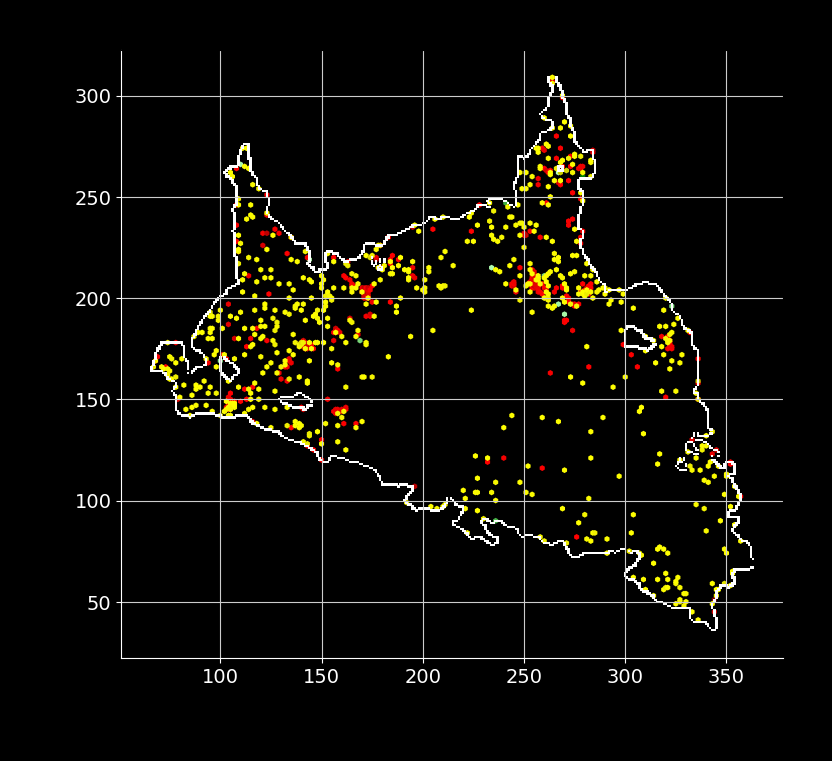

In [36]:
# 创建黑色背景的图形
plt.figure(figsize=(10, 8))
ax = plt.gca()
ax.set_facecolor('black')  # 设置绘图区域背景为黑色
ax.figure.patch.set_facecolor('black')  # 设置图框背景为黑色

alpha = 1
# 定义绿色调色板
colors = [(0.7, 1.0, 0.7), (0.0, 0.5, 0.0)]  # (浅绿色, 深绿色)
cmap_name = 'custom_green'
custom_green_cmap = LinearSegmentedColormap.from_list(cmap_name, colors)

# 绘制第一个 DataFrame 的 plasma列散点图
green_scatter = sns.scatterplot(
    x='X', 
    y='Y',   
    size=0.1,
    hue='Plasmablasts',  # 使用 A 列的数值控制点的颜色
    palette=custom_green_cmap,  # 使用绿色调色板
    data=df1[df1['Plasmablasts'] > 0.15],
    marker='h',  # 设置点的形状为圆形
    edgecolor='none',  # 去掉点的边框
    alpha= alpha,   # 设置透明度为 50%
    legend=None, # 不显示图例
    ax=ax
)

# 定义从鲜红色到深红色的调色板
red_colors = [(1.0, 0.0, 0.0), (0.5, 0.0, 0.0)]  # (鲜红色, 深红色)
red_cmap_name = 'custom_red'
custom_red_cmap = LinearSegmentedColormap.from_list(red_cmap_name, red_colors)

# 绘制散点图
red_scatter = sns.scatterplot(
    x='X', 
    y='Y', 
    size=0.1,  # 使用 T 列的数值控制点的大小
    hue='T-cells',   # 使用 T 列的数值控制点的颜色
    palette=custom_red_cmap,  # 使用自定义的红色调色板
    data=df1[df1['T-cells'] > 0.08],
    marker='h',  # 设置点的形状为六边形
    edgecolor='none',  # 去掉点的边框
    alpha=1,   # 设置透明度为 50%
    legend=None, # 不显示图例
    ax=ax
)

# 定义黄色调色板
yellow_colors = [(1.0, 1.0, 0.0), (0.8, 0.8, 0.0)]  # (浅紫色, 深紫色)
yellow_cmap_name = 'custom_yellow'
custom_yellow_cmap = LinearSegmentedColormap.from_list(yellow_cmap_name, yellow_colors)

# 绘制第二个 DataFrame 的 B 列散点图
purple_scatter = sns.scatterplot(
    x='X', 
    y='Y', 
    size=0.1,  # 使用 B 列的数值控制点的大小
    hue='B-cells',   # 使用 B 列的数值控制点的颜色
    palette=custom_yellow_cmap,  # 使用紫色调色板
    data=df1[df1['B-cells'] > 0.05],
    marker='h',  # 设置点的形状为圆形
    edgecolor='none',  # 去掉点的边框
    alpha=alpha,   # 设置透明度为 50%
    legend=None, # 不显示图例
    ax=ax
)

# 绘制第二个 DataFrame 的 X 和 Y 列
sns.scatterplot(
    x='X', 
    y='Y', 
    data=df2,
    color='white',  # 设置点的颜色为白色
    marker='s',     # 设置点的形状为正方形
    s=3,          # 设置点的大小
    edgecolor='none',  # 去掉点的边框
    legend=None,    # 不显示图例
    ax=ax
)

# 设置坐标轴颜色为白色
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_aspect('equal')

plt.savefig('BC_D06054C4_bin50_plot.png', dpi=300, bbox_inches='tight')
plt.show()